# USP - EACH - SIN5007 - Reconhecimento de Padrões
## Grupo H/8 - Atividade 03 - PCA
### Tratamento do Arquivo Total SPHARM

Tomamos as seguintes decisões:

Atributo Idade - Preenchemos os dados faltantes com a média, pois só existiam 5 ocorrências

Atributos SPHARMs - Vamos criar os seguintes atributos:

-- somatória por amostra (linha)

-- média

-- Quantidade de ocorrências preenchidas

Classes - 

Primeiro vamos calcular o PCA com as 3 classes (direto, com padronização e normalização).

Depois, vamos considerar o PCA somente para duas classes 0 e 2 e outro PCA para 0 e 1 (padronizada e normalizada)

In [1]:
# Importando e abrindo o arquivo
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

df = pd.read_csv('Total_SPHARM_20200326.csv', header=None)

print(f'Nome do Arquivo: Total_SPHARM_20200326.csv')
print(f'Estrutura do arquivo: \nQuantidade de linhas: {df.shape[0]} \nQuantidade de Colunas: {df.shape[1]}')
df.head()

Nome do Arquivo: Total_SPHARM_20200326.csv
Estrutura do arquivo: 
Quantidade de linhas: 400 
Quantidade de Colunas: 718


,0,1,2,3,4,5,6,7,8,9,...,708,709,710,711,712,713,714,715,716,717
0,id001,29.0,0.0,1.0,-7881.480247,-5759.969698,-24465.608592,-15275.106756,-22974.378070,-22686.138288,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,id002,31.0,0.0,1.0,-567.772697,-33.292309,-465.179132,-525.981010,-469.546900,-305.182676,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,id003,27.0,0.0,1.0,-135372.767326,-115124.114646,-772665.053883,-292331.423079,-58059.255010,-118464.329594,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,id004,52.0,0.0,1.0,-582.939571,-366.425893,-281.022452,-437.739821,-206.814933,-230.346112,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,id005,56.0,0.0,1.0,-913.082501,-334.221895,-449.102108,-113.637478,-50.065343,-127.180338,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [2]:
# Transformando a coluna de idade em numérica
df[1].astype(int)

#Transformando a coluna de classe em numérica
df[717].astype(int)

print(type(df[1]))

<class 'pandas.core.series.Series'>


In [3]:
#Vamos excluir a primeira coluna que identifica a amostra e reescalona o índice de colunas
dfa = df.iloc[:, 1:]
dfa.columns = range(dfa.shape[1])

print(f'Estrutura do arquivo: \nQuantidade de linhas: {dfa.shape[0]} \nQuantidade de Colunas: {dfa.shape[1]}')
dfa.head()

Estrutura do arquivo: 
Quantidade de linhas: 400 
Quantidade de Colunas: 717


,0,1,2,3,4,5,6,7,8,9,...,707,708,709,710,711,712,713,714,715,716
0,29.0,0.0,1.0,-7881.480247,-5759.969698,-24465.608592,-15275.106756,-22974.378070,-22686.138288,-6131.488463,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,31.0,0.0,1.0,-567.772697,-33.292309,-465.179132,-525.981010,-469.546900,-305.182676,-89.243364,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,27.0,0.0,1.0,-135372.767326,-115124.114646,-772665.053883,-292331.423079,-58059.255010,-118464.329594,-585147.837935,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,52.0,0.0,1.0,-582.939571,-366.425893,-281.022452,-437.739821,-206.814933,-230.346112,-126.535277,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,56.0,0.0,1.0,-913.082501,-334.221895,-449.102108,-113.637478,-50.065343,-127.180338,-640.351614,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [4]:
# Coluna de Idade
# Através do MS/Excel (mais fácil) alteramos todos os conteúdos que não eram numéricos 
# para 0 (já havíamos verificado a não existência desta idade).

# Calculando a média das colunas
media = list(dfa.mean(axis=0))

# Alterando de 0 para a média da idade
for i in range(len(dfa)):
    if (dfa.iloc[i, 0] == 0):
        dfa.iloc[i, 0] = int(media[0])        

In [5]:
import math

# Somatória dos SPHARMS por linha
dfa[717] = 0.00    #somatória
dfa[718] = 0.00    #média
dfa[719] = 0       #quantidade de colunas preenchidas

for l in range(len(dfa)):
    soma = 0.00
    qtdc = 0
    qtdn = 0
    for c in range(len(dfa.loc[l])):
        if (c in [0, 1, 2, 716, 717, 718, 719]):
            continue
        else:
            #print(l, c, len(dfa.loc[l]))
            dfa.iloc[l, c].astype(float)
            if (pd.isna(dfa.iloc[l, c])):
                continue
            else:
                qtdn += 1
                soma = soma + dfa.iloc[l, c]
                qtdc += 1
            
    
    dfa.iloc[l, 717] = soma
    dfa.iloc[l, 718] = soma / qtdc
    dfa.iloc[l, 719] = qtdn
    
dfa.head()

,0,1,2,3,4,5,6,7,8,9,...,710,711,712,713,714,715,716,717,718,719
0,29.0,0.0,1.0,-7881.480247,-5759.969698,-24465.608592,-15275.106756,-22974.378070,-22686.138288,-6131.488463,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,-5.613779e+06,-12283.979912,457
1,31.0,0.0,1.0,-567.772697,-33.292309,-465.179132,-525.981010,-469.546900,-305.182676,-89.243364,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,-1.267293e+05,-560.749256,226
2,27.0,0.0,1.0,-135372.767326,-115124.114646,-772665.053883,-292331.423079,-58059.255010,-118464.329594,-585147.837935,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,-1.153833e+08,-409160.620274,282
3,52.0,0.0,1.0,-582.939571,-366.425893,-281.022452,-437.739821,-206.814933,-230.346112,-126.535277,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,-1.197444e+05,-453.577356,264
4,56.0,0.0,1.0,-913.082501,-334.221895,-449.102108,-113.637478,-50.065343,-127.180338,-640.351614,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,-7.692539e+04,-392.476464,196


In [6]:
#Exclusão das colunas de atributos SPHARM
dfb = pd.DataFrame()
dfb[0] = dfa[0]
dfb[1] = dfa[1]
dfb[2] = dfa[2]
dfb[717] = dfa[717]
dfb[718] = dfa[718]
dfb[719] = dfa[719]
dfb[720] = dfa[716]
dfb.columns = range(dfb.shape[1])

print(f'Estrutura do arquivo: \nQuantidade de linhas: {dfb.shape[0]} \nQuantidade de Características: {dfb.shape[1]}')
print('Colunas')
print('0 - Idade')
print('1 e 2 - sexo M/F')
print('3 - Somatória dos atributos SPHARM')
print('4 - Média da somatória dos atributos SPHARM')
print('5 - Quantidade de colunas preenchidas')
print('6 - Classes')
dfb.head()

Estrutura do arquivo: 
Quantidade de linhas: 400 
Quantidade de Características: 7
Colunas
0 - Idade
1 e 2 - sexo M/F
3 - Somatória dos atributos SPHARM
4 - Média da somatória dos atributos SPHARM
5 - Quantidade de colunas preenchidas
6 - Classes


,0,1,2,3,4,5,6
0,29.0,0.0,1.0,-5.613779e+06,-12283.979912,457,0.0
1,31.0,0.0,1.0,-1.267293e+05,-560.749256,226,0.0
2,27.0,0.0,1.0,-1.153833e+08,-409160.620274,282,0.0
3,52.0,0.0,1.0,-1.197444e+05,-453.577356,264,0.0
4,56.0,0.0,1.0,-7.692539e+04,-392.476464,196,0.0


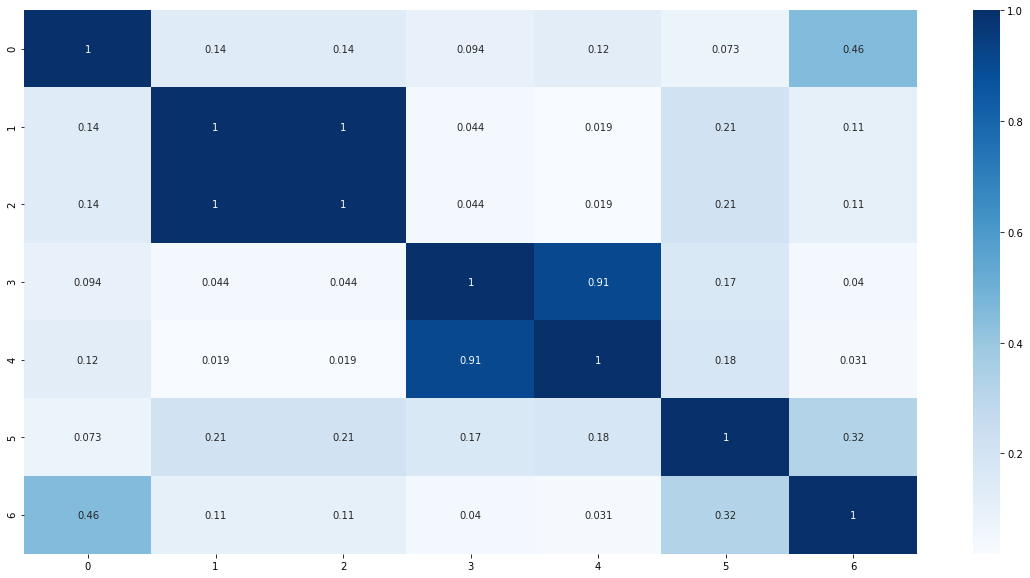

In [7]:
# Correlação entre os Atributos
plt.figure(figsize=(20, 10))

corr = dfb.corr()
my_cols = corr.columns.to_list()

sns.heatmap(np.abs(corr.values), annot=True, cmap='Blues')

# PCA

In [8]:
#Para facilitar o processamento do PCA, vamos converter os dados para o formato numpy.

dt = dfb.to_numpy()

nrow, ncol = dt.shape

y = dt[:,6]
X = dt[:,:6]

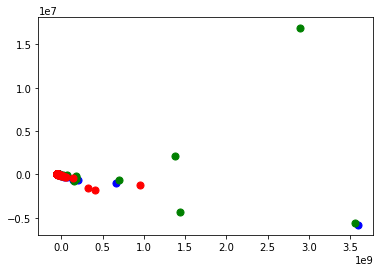

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca_result = pca.fit_transform(X)

classes = np.unique(y)

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
aux = 0

for c in classes:
    if c == 0:
        lb = 'Normal'
    elif c == 1:
        lb = 'Hiper'
    else:
        lb = 'Sub'
    nodes = np.where(y == c)
    plt.scatter(pca_result[nodes,0], pca_result[nodes,1], s=50, color = colors[aux], label = lb)
    aux = aux + 1

## Padronização

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
Xp = scaler.transform(X)

print('Dados transformados:')
print('Media: ', np.mean(Xp, axis = 0))
print('Desvio Padrao:', np.std(Xp, axis = 0))

Dados transformados:
Media:  [-3.55271368e-17 -3.55271368e-17  3.55271368e-17  0.00000000e+00
  8.88178420e-18 -2.30926389e-16]
Desvio Padrao: [1. 1. 1. 1. 1. 1.]


## PCA com Padronização

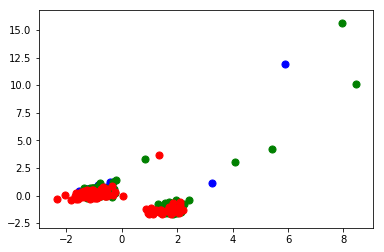

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca_result = pca.fit_transform(Xp)

classes = np.unique(y)

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
aux = 0

for c in classes:
    if c == 0:
        lb = 'Normal'
    elif c == 1:
        lb = 'Hiper'
    else:
        lb = 'Sub'
    nodes = np.where(y == c)
    plt.scatter(pca_result[nodes,0], pca_result[nodes,1], s=50, color = colors[aux], label = lb)
    aux = aux + 1

## Normalização

In [13]:
from sklearn.preprocessing import MinMaxScaler

y = dfb.iloc[:,6]
Xn = dfb.iloc[:,:6]

scaler = MinMaxScaler()
scaler.fit(Xn)

Xn.iloc[:, :] = scaler.transform(Xn)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


## PCA com Normalização

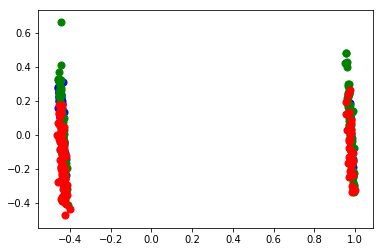

In [14]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca_result = pca.fit_transform(Xn)

classes = np.unique(y)

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
aux = 0

for c in classes:
    if c == 0:
        lb = 'Normal'
    elif c == 1:
        lb = 'Hiper'
    else:
        lb = 'Sub'
    nodes = np.where(y == c)
    plt.scatter(pca_result[nodes,0], pca_result[nodes,1], s=50, color = colors[aux], label = lb)
    aux = aux + 1

# PCA - Utilizando apenas as classes 0 e 2

In [15]:
# Excluindo as linhas com classe = 1
dfc = dfb.drop(dfb[dfb[6] == 1.00].index)
dfc.shape

(217, 7)

In [16]:
#Para facilitar o processamento do PCA, vamos converter os dados para o formato numpy.

dt = dfc.to_numpy()

nrow, ncol = dt.shape

y = dt[:,6]
X = dt[:,:6]

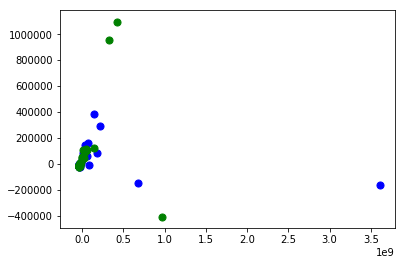

In [17]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

classes = np.unique(y)

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
aux = 0

for c in classes:
    if c == 0:
        lb = 'Normal'
    elif c == 1:
        lb = 'Hiper'
    else:
        lb = 'Sub'
    nodes = np.where(y == c)
    plt.scatter(pca_result[nodes,0], pca_result[nodes,1], s=50, color = colors[aux], label = lb)
    aux = aux + 1

## PCA com Padronização - Classes 0 e 2

Dados transformados:
Media:  [ 1.30975619e-16  9.82317146e-17  6.54878097e-17  1.63719524e-17
 -4.09298811e-18  3.27439049e-17]
Desvio Padrao: [1. 1. 1. 1. 1. 1.]


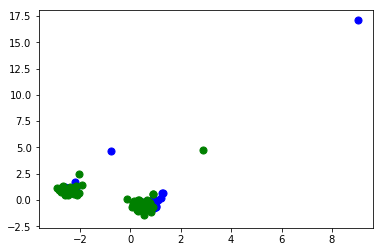

In [18]:
# Padronizando

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
Xp = scaler.transform(X)

print('Dados transformados:')
print('Media: ', np.mean(Xp, axis = 0))
print('Desvio Padrao:', np.std(Xp, axis = 0))

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(Xp)

classes = np.unique(y)

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
aux = 0

for c in classes:
    if c == 0:
        lb = 'Normal'
    elif c == 1:
        lb = 'Hiper'
    else:
        lb = 'Sub'
    nodes = np.where(y == c)
    plt.scatter(pca_result[nodes,0], pca_result[nodes,1], s=50, color = colors[aux], label = lb)
    aux = aux + 1

## PCA com Normalização - Classes 0 e 2

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


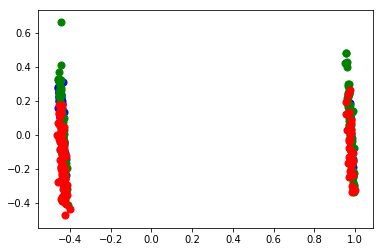

In [19]:
# Normalizando
from sklearn.preprocessing import MinMaxScaler

y = dfb.iloc[:,6]
Xn = dfb.iloc[:,:6]

scaler = MinMaxScaler()
scaler.fit(Xn)

Xn.iloc[:, :] = scaler.transform(Xn)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(Xn)

classes = np.unique(y)

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
aux = 0

for c in classes:
    if c == 0:
        lb = 'Normal'
    elif c == 1:
        lb = 'Hiper'
    else:
        lb = 'Sub'
    nodes = np.where(y == c)
    plt.scatter(pca_result[nodes,0], pca_result[nodes,1], s=50, color = colors[aux], label = lb)
    aux = aux + 1